### INDEX

[<font color='#bfd532'>1. Data Exploration</font>](#exploration) <br>
[<font color='#bfd532'>1.1 Import Packages</font>](#imports) <br>
[<font color='#bfd532'>2. Data Preprocessing</font>](#preprocessing) <br>
[<font color='#bfd532'>3. Feature Engineering</font>](#featureengineering)<br>
[<font color='#bfd532'>4. Classification Models </font>](#classificationmodels)<br>
[<font color='#bfd532'>5. Evaluation</font>](#evaluation)<br>

# TM PROJECT NOTEBOOK


Group number: `3`

Group members:
1. `Alex Santander: 20220658`
2. `Janaina Santos: 20220640`
3. `Inês Rocha: 20220052`
4. `Skander Chaabini: 20221041`


<div class="alert alert-block alert-info">

# <font color='#bfd532'>1. Data Exploration</font> <a class="anchor" id="exploration"></a>
    
</div>

<div class="alert alert-block alert-info">

# <font color='#bfd532'>1.1 Import Packages</font> <a class="anchor" id="imports"></a>
    
</div>

In [10]:
#!pip install install openpyxl

In [53]:
#!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 2.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import nltk
import string

In [4]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /Users/nekas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nekas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Loading Datasets

In [5]:
train_reviews = pd.read_excel('Project_Corpora/train_reviews.xlsx')
test_reviews = pd.read_excel('Project_Corpora/test_reviews.xlsx')
train_data = pd.read_excel('Project_Corpora/train.xlsx',index_col=0)
test_data = pd.read_excel('Project_Corpora/test.xlsx', index_col=0)

In [6]:
train_data.head()

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [22]:
test_data.head()

,description,host_about
index,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
4,Charming Apartment Close to the Bay of Cascais...,:)
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [23]:
train_reviews.head(3)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."


In [24]:
test_reviews.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12496 entries, 1 to 12496
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  12496 non-null  object
 1   host_about   12496 non-null  object
 2   unlisted     12496 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 390.5+ KB


We don't have missing values in any of the columns in our train_data dataframe

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 1 to 1389
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  1389 non-null   object
 1   host_about   1389 non-null   object
dtypes: object(2)
memory usage: 32.6+ KB


We also don't have missing values in any of the columns in our train_data dataframe

In [35]:
train_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721402 entries, 0 to 721401
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     721402 non-null  int64 
 1   comments  721402 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.0+ MB


In [36]:
test_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80877 entries, 0 to 80876
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     80877 non-null  int64 
 1   comments  80877 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


We also don't have missing values in any of the columns in the train_reviews and test_reviews dataframe

In [28]:
train_data['unlisted'].unique()

array([0, 1])

We confirm that our target variable is binary and we check its distribution

In [31]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
unlisted,12496.0,0.277129,0.447598,0.0,0.0,0.0,1.0,1.0


Since the mean is closer to zero, we know that we have many more listings that were keep in the next quarte that the ones that "churned".

In [48]:
train_data.unlisted.value_counts()/len(train_data)

0    0.722871
1    0.277129
Name: unlisted, dtype: float64

We can see that about 27.7% of the listings didn't stay listed in this quarter.

<Axes: >

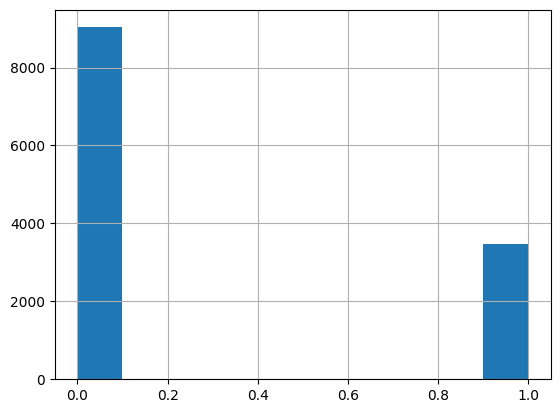

In [48]:
train_data['unlisted'].hist()

<Axes: >

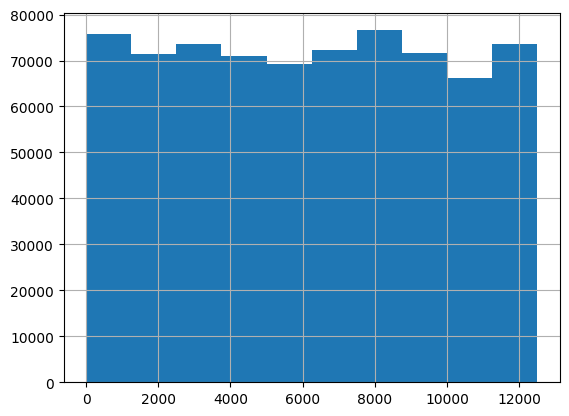

In [51]:
train_reviews['index'].hist()

<Axes: >

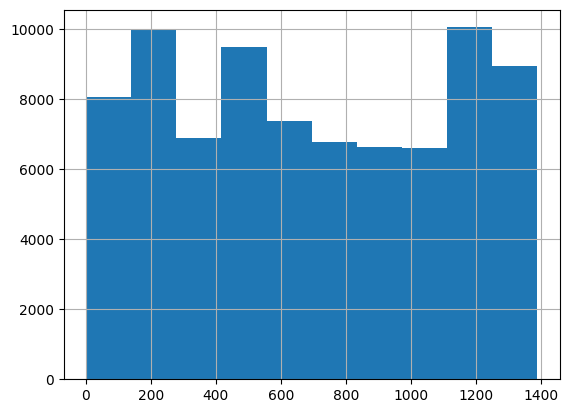

In [52]:
test_reviews['index'].hist()

i wanted to see if a listing stood out more in terms of reviews that others. maybe i have to try another approach.

In [30]:
train_data.describe(include = "object").T

,count,unique,top,freq
description,12496,11788,<b>License number</b><br />Exempt,50
host_about,12496,4396,We are Feels Like Home Holiday Rentals.\nA com...,304


In [32]:
test_data.describe(include = "object").T

,count,unique,top,freq
description,1389,1373,<b>The space</b><br />Lisbon Nouveau apartment...,3
host_about,1389,946,We are Feels Like Home Holiday Rentals.\nA com...,32


In [33]:
train_reviews.describe(include = "object").T

,count,unique,top,freq
comments,721402,705644,.,908


In [34]:
test_reviews.describe(include = "object").T

,count,unique,top,freq
comments,80877,79859,.,131


In [39]:
print('Number of "duplicated" reviews = ' + str(train_reviews.duplicated().sum() ) )

Number of "duplicated" reviews = 305


We have 305 reviews that share the same listing and description. They are not duplicated per say it because in the train_reviews dataframe we just have the listing id, host_about and description but the reviews can be made by multiple people. ---> Explain this better 

In [40]:
print('Number of "duplicated" reviews = ' + str(test_reviews.duplicated().sum() ) )

Number of "duplicated" reviews = 30


We have 30 reviews that share the same listing and description.

In [44]:
train_data['description'].value_counts()

<b>License number</b><br />Exempt                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [45]:
train_data['host_about'].value_counts()

We are Feels Like Home Holiday Rentals.\nA company that was born with a unique purpose: to bring you the best living experience during your trip to Portugal.\nThat’s right we want you to feel like home! We offer beautifully furnished, well-located apartments and houses for your holiday or business stay. We're ideal for travelers who enjoy sleeping in comfortable homes at comfortable prices!\nWe offer you options!\nChoose from over 500 carefully selected properties in Portugal, suited for every taste and every occasion. From studios to rustic country homes to sleek city duplexes, whether it´s in Algarve, Ericeira, Lisbon, Madeira, Porto, or somewhere in between, we have a property that's right for you!                                                                                                                                                  304
Dear guest.\n\nWe take pride in helping thousands of busy hosts across Europe to rent their properties professionally so you can have the st

In [46]:
train_reviews['comments'].value_counts()

.                                                                                                                                                                                                                                                                                                                                                                       908
Great location!                                                                                                                                                                                                                                                                                                                                                         256
Great location                                                                                                                                                                                                                                                                  

In [47]:
test_reviews['comments'].value_counts()

.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Both in test and train reviews dataframes, we have that a single point is the most comomn review. it doesn't tell us much about the listings. This was also confirmed by the train/test_reviews.describe() cells

### Word Count

In [60]:
train_data['word_count']  = train_data['description'].apply(lambda x: len(str(x).split(" ")))
train_data = train_data.sort_values(by='word_count', ascending=True)
train_data[['description','word_count']]

,description,word_count
index,,
5683,<b>License number</b><br />7797/AL,3
10317,<b>License number</b><br />81309/AL,3
11607,<b>License number</b><br />87804/AL,3
7564,<b>License number</b><br />48184/AL,3
12194,<b>License number</b><br />Exempt,3
...,...,...
2047,Sunny apartment 10 m from beach and train stat...,205
6453,"Apartamento completo de Dois pisos ,total de 4...",205
6600,Casa das Mónicas is a 3-storey house between ...,205


<Axes: >

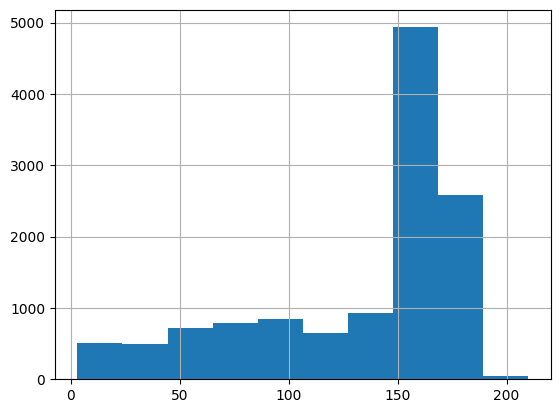

In [66]:
train_data['word_count'].hist()

In [61]:
test_data['word_count']  = test_data['description'].apply(lambda x: len(str(x).split(" ")))
test_data = test_data.sort_values(by='word_count', ascending=True)
test_data[['description','word_count']]

,description,word_count
index,,
134,<b>License number</b><br />121745/AL,3
860,<b>License number</b><br />56788/AL,3
543,<b>License number</b><br />26330/AL,3
468,<b>License number</b><br />44062-AL,3
643,<b>License number</b><br />17490/AL,3
...,...,...
491,Be very welcome to the Bamboo Beach house! A a...,195
1177,The Family Cottage.<br /><br />Wake up to the ...,197
655,The villa in Ericeira has 4 bedrooms and has c...,204


<Axes: >

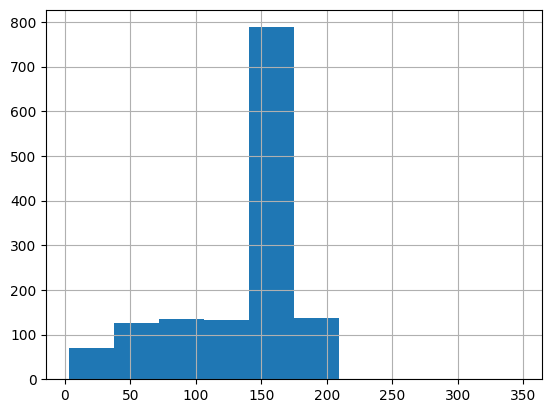

In [67]:
test_data['word_count'].hist()

In [36]:
train_reviews['word_count']  = train_reviews['comments'].apply(lambda x: len(str(x).split(" ")))
train_reviews = train_reviews.sort_values(by='word_count', ascending=True)
train_reviews[['comments','word_count']]

# filter the dataframe to only include rows with 3 words or less
short_comments = train_reviews[train_reviews['word_count'] <= 3]

# print out the resulting dataframe
short_comments[['comments', 'word_count']].head(100)

,comments,word_count
120147,Luis的房子地點非常的好，無論是地鐵、28號公車、或是其他交通工具。房子非常舒適，所有需要...,1
608025,amazingflat!,1
3259,Bien,1
268869,amazing,1
638782,Magnifica!,1
...,...,...
187791,房子的位置非常好，如果要去sintra玩一定要住这里，可以节省很多时间，这里去老城区步行就可...,1
638051,Recommended,1
608016,火车路过一整晚噪声太大，无法入睡！,1
215336,N/à,1


i dont know why this is outputing the 1º and 3º cell as 1 word

<Axes: >

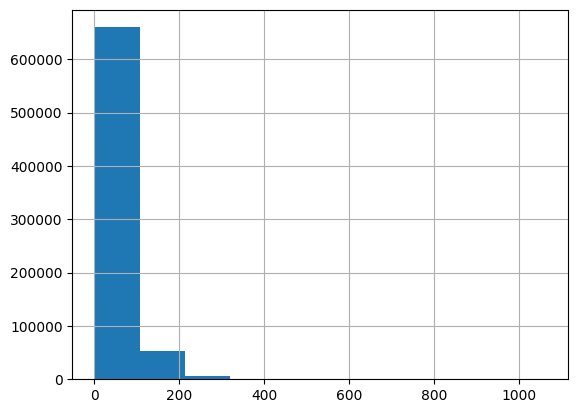

In [68]:
train_reviews['word_count'].hist()

In [38]:
test_reviews['word_count']  = test_reviews['comments'].apply(lambda x: len(str(x).split(" ")))
test_reviews = test_reviews.sort_values(by='word_count', ascending=True)
test_reviews[['comments','word_count']].head()

,comments,word_count
5398,房东迟到30分钟。。。。,1
39705,テージョ川を見下ろす立地、地下鉄の駅まで4分足らず、近くに多くの<br/>バルやファド、レス...,1
33701,Perfeito!,1
56866,-,1
17222,good,1


In [39]:
test_reviews.word_count.describe()

count    80877.000000
mean        48.029984
std         46.281235
min          1.000000
25%         18.000000
50%         36.000000
75%         64.000000
max        989.000000
Name: word_count, dtype: float64

In [ ]:
test_reviews['word_count'] = test_reviews['comments'].str.split().str.len()
test_reviews = test_reviews.sort_values(by='word_count', ascending=True)
test_reviews[['comments','word_count']]

<Axes: >

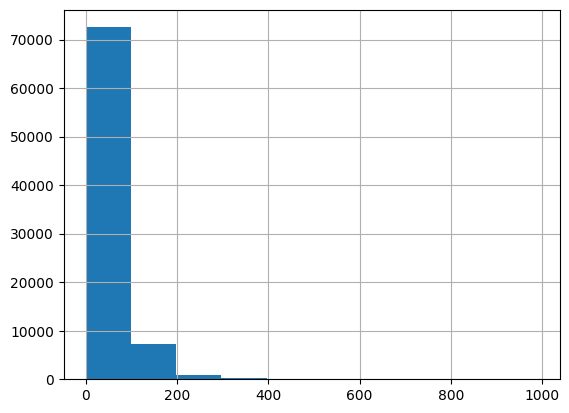

In [69]:
test_reviews['word_count'].hist()

### Word Cloud

In [54]:
#!pip install wordcloud

In [53]:
from wordcloud import WordCloud

In [58]:
import re

from wordcloud import WordCloud

text = ' '  # Empty string
for review in train_data['host_about']:
    text += re.sub(r'[^\w\s]', ' ', review) + ' '

# Clean all the text of non-word characters   

cloud_train_reviews = WordCloud().generate(text)
# Generate the wordcloud

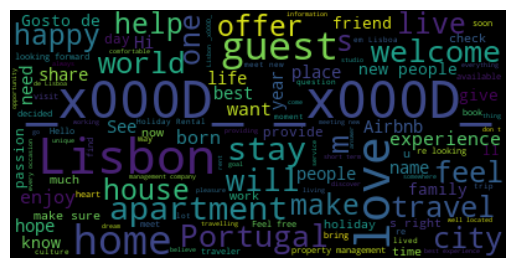

In [60]:
plt.imshow(cloud_train_reviews, interpolation='bilinear') 
plt.axis("off")
plt.show()

### Word Frequencies

In [40]:
all_words_des = ' '.join(train_data['description']).split()

In [41]:
freq = pd.Series(all_words_des).value_counts()

In [44]:
freq.sort_values(ascending=False)[0:10]

the      62717
and      54907
a        50700
/><br    34826
to       30520
of       30050
in       28007
with     27033
is       23957
de       13708
dtype: int64

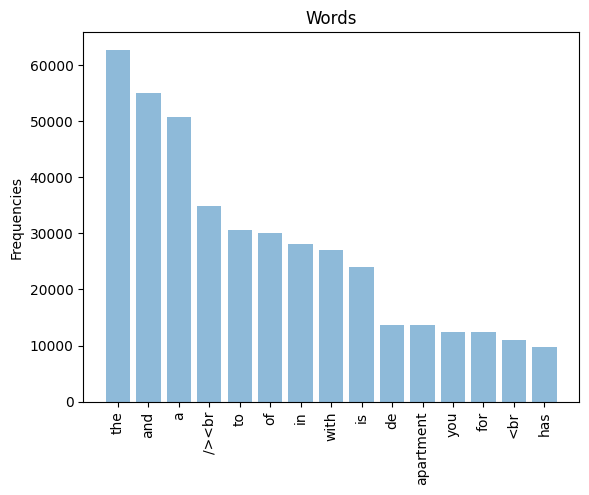

In [46]:
x_labels = freq.index[0:15]
values = freq[:15]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">

# <font color='#bfd532'>2. Data Preprocessing</font> <a class="anchor" id="preprocessing"></a>
    
</div>

## Data cleaning

In [2]:
train_data['host_about'].split()

NameError: name 'train_data' is not defined

In [1]:
import string
exclude = set(string.punctuation)

In [ ]:
host_about_tokens_list = [word for word in host_about_tokens_list if word not in exclude]

### Regular expressions

<div class="alert alert-block alert-info">

# <font color='#bfd532'>3. Feature Engineering</font> <a class="anchor" id="featureengineering"></a>
    
</div>

Creating a new feature called number_of_reviews

In [8]:
merged_df = train_data.merge(train_reviews, on='index', how='left')
merged_df.tail()


,index,description,host_about,unlisted,comments
725426,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,"We are Airbnb Super Hosts too, so trust me, Li..."
725427,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,We had a lovely stay at this apartment. Sofia ...
725428,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,"Clean, very good position, easy checkin, the p..."
725429,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,NaN
725430,12496,This brandnew Apartment combines elegant charm...,We are a German-Portuguese couple with a Passi...,1,NaN


In [11]:
grouped = merged_df.groupby('index')

,index,description,host_about,unlisted,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ..."
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe..."
...,...,...,...,...,...
725222,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,.
725223,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,O apto é excelente. Tal como nas fotos! Camas ...
725224,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,We had a very lovely stay in Lisbon.The apartm...
725429,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,NaN


In [10]:
num_reviews = grouped['comments'].count()
num_reviews

index
1         50
2          0
3          0
4          0
5         41
        ... 
12492    312
12493     35
12494    209
12495      0
12496      0
Name: comments, Length: 12496, dtype: int64

In [12]:
train_data['number_of_reviews'] = num_reviews

In [14]:
train_data.tail()

,description,host_about,unlisted,number_of_reviews
index,,,,
12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,Travelling is one of my favorite hobbies. I've...,0,312
12493,Beautifully located in the heart of Lisbon's h...,Founded by travel enthusiasts (just like you) ...,0,35
12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,209
12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,0
12496,This brandnew Apartment combines elegant charm...,We are a German-Portuguese couple with a Passi...,1,0


Appling the same transformations for the test_data dataframe

In [15]:
merged_test_df = test_data.merge(train_reviews, on='index', how='left')
test_grouped = merged_test_df.groupby('index')  
num_reviews = test_grouped['comments'].count()
test_data['number_of_reviews'] = num_reviews
test_data.head()

,description,host_about,number_of_reviews
index,,,
1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",50
2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,0
3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",0
4,Charming Apartment Close to the Bay of Cascais...,:),0
5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,41


<div class="alert alert-block alert-info">

# <font color='#bfd532'>4. Classification Models</font> <a class="anchor" id="classificationmodels"></a>
    
</div>

In [17]:
!pip install sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 4.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.6/197.6 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 8.5 MB/s eta 0:00:0000:0100:01m
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=d7a7be806b3b52799c71053ffee79c06d1754ea746e968bb9ad8a0ebedbfe6db
  Stored in direct

In [18]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distiluse-base-multilingual-cased')

In [19]:
merged_df.head()

,index,description,host_about,unlisted,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ..."
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe..."


In [28]:
# See non-null values
merged_df[merged_df['description'].notnull()]['description']

# Check data types 
merged_df['description'].dtype

# Check number of non-string values
merged_df['description'].astype(str).isnull().sum()

0

check how to do this

In [21]:
merged_df['description'] + ' ' + merged_df['host_about'] + ' ' + merged_df['comments']


TypeError: can only concatenate str (not "int") to str

In [ ]:
embeddings = model.encode(all_text_df['text'])

In [ ]:
labels = train_data['unlisted']

<div class="alert alert-block alert-info">

# <font color='#bfd532'>5. Evaluation</font> <a class="anchor" id="evaluation"></a>
    
</div>